# importing Libraries 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# dataset

In [2]:
mall_data = pd.read_csv('Mall_customers.csv')

In [3]:
# Display the first few rows of the dataset
print(mall_data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Selecting relevant features
X = mall_data.iloc[:, [3, 4]].values  # We'll use Annual Income and Spending Score for segmentation

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
mall_data.shape

(200, 5)

# Apply K-means clustering with a predefined number of clusters

In [8]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


# Visualize the clusters

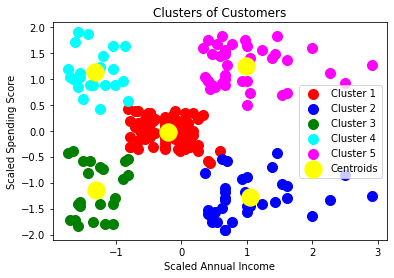

In [9]:
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()


# importing Seaborn

In [10]:
import seaborn as sns

In [11]:
# Convert the scaled data to a DataFrame
X_df = pd.DataFrame(X_scaled, columns=['Scaled Annual Income', 'Scaled Spending Score'])

# Add cluster labels to the DataFrame
X_df['Cluster'] = y_kmeans

In [12]:
# Create a pivot table to aggregate the data for heatmap
heatmap_data = X_df.pivot_table(index='Cluster', values=['Scaled Annual Income', 'Scaled Spending Score'], aggfunc='mean')


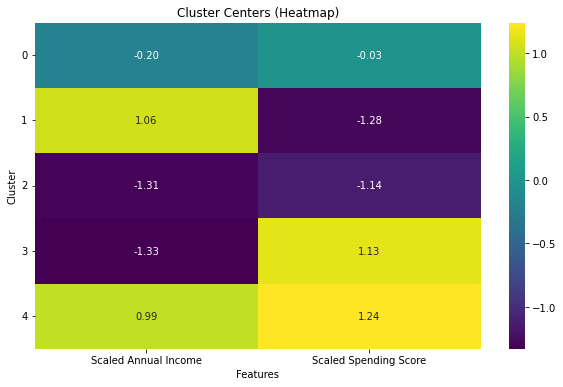

In [13]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2f')
plt.title('Cluster Centers (Heatmap)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.yticks(rotation=0)
plt.show()